In [1]:
#switched to elu

In [3]:
import numpy as np
import pandas as pd
import cv2
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.layers.convolutional import Conv2D, Cropping2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras import backend as K
from keras.optimizers import SGD
from tqdm import tqdm
import random

#print(K.image_data_format())
#'channels_first'
#K.set_image_data_format('channels_last')
#print(K.image_data_format())

images_list = []
split = 8000

data = pd.read_csv('mydata2/driving_log.csv')


all data (27241, 1)
all images (27241, 1)
all data [[ 0.04166667]
 [-0.02112676]
 [-0.03125   ]
 ..., 
 [-0.07276995]
 [-0.00297619]
 [ 0.04166667]]
all images [[ 'S:\\AI NEURAL NETWORKS PYTHON UDACITY\\UDACITY - MY CAR NANODEGREE\\p3\\mydata2\\IMG\\center_2017_07_10_05_09_23_872.jpg']
 [ '/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_27_395.jpg']
 [ 'S:\\AI NEURAL NETWORKS PYTHON UDACITY\\UDACITY - MY CAR NANODEGREE\\p3\\mydata2\\IMG\\center_2017_07_10_04_59_54_600.jpg']
 ..., 
 [ '/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_34_42_461.jpg']
 [ 'S:\\AI NEURAL NETWORKS PYTHON UDACITY\\UDACITY - MY CAR NANODEGREE\\p3\\mydata2\\IMG\\center_2017_07_10_05_05_05_505.jpg']
 [ 'S:\\AI NEURAL NETWORKS PYTHON UDACITY\\UDACITY - MY CAR NANODEGREE\\p3\\mydata2\\IMG\\center_2017_07_10_05_10_16_241.jpg']]
[-404.7619]
[ 383.8028]
<class 'numpy.ndarra

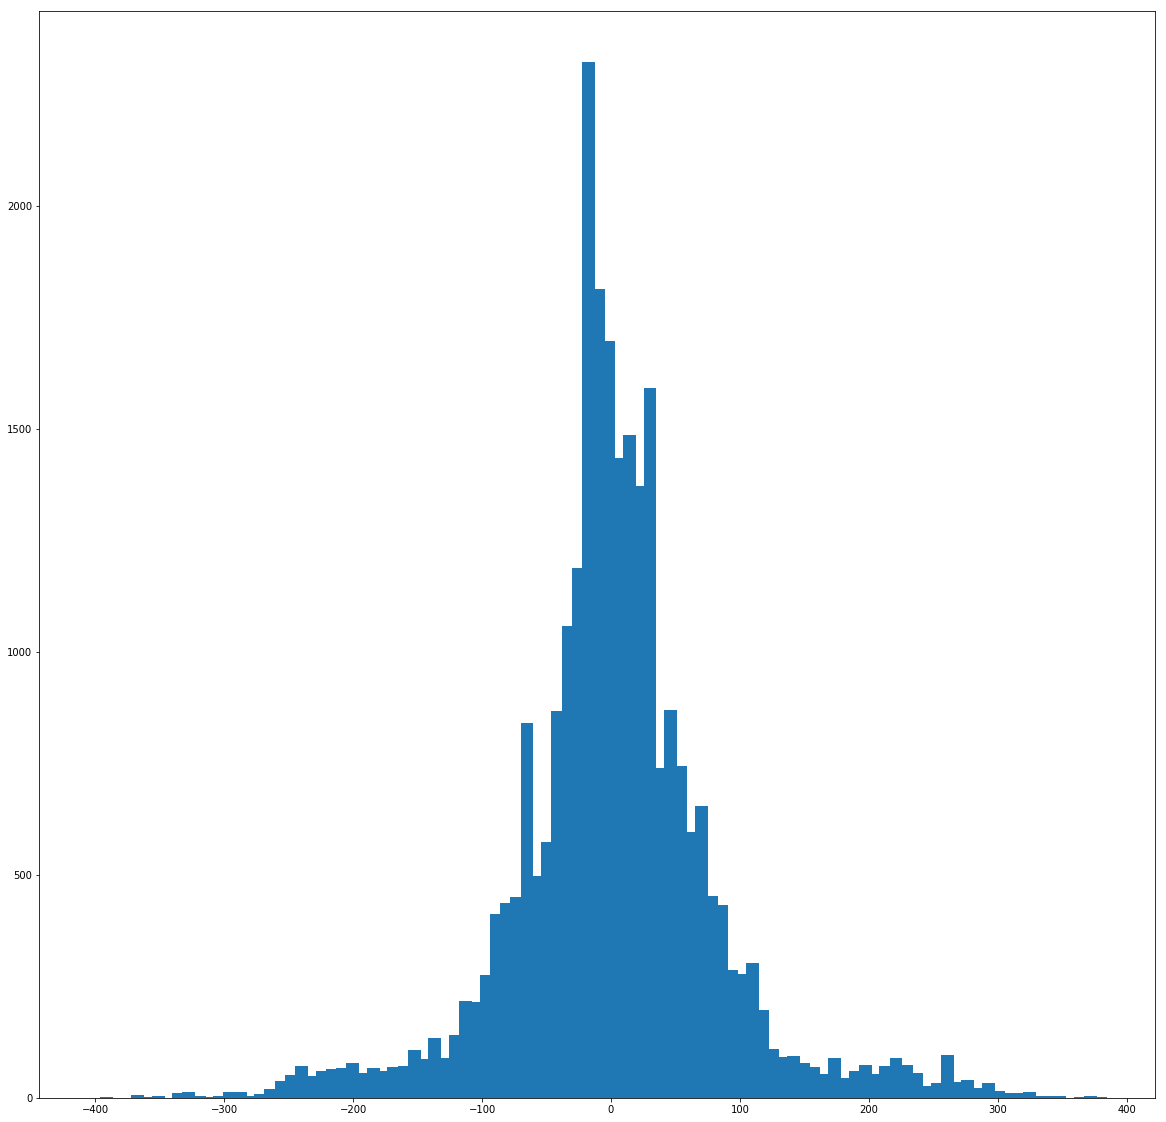

sharp_turn_images (2904,)
bsharp_turn_data (2904,)
straight_drv_images (24337,)
straight_drv_data (24337,)
straight_drv_images (2433,)
straight_drv_data (2433,)
All (8241,)
All (8241,)
turn mag type <class 'numpy.ndarray'>
turn mag full [-215.7738  -244.0476  -122.0238  ...,   31.25      43.15476   68.45238]
-404.7619
383.8028
<class 'numpy.ndarray'>
<class 'numpy.float64'>
[-404.         -396.05050505 -388.1010101  -380.15151515 -372.2020202
 -364.25252525 -356.3030303  -348.35353535 -340.4040404  -332.45454545
 -324.50505051 -316.55555556 -308.60606061 -300.65656566 -292.70707071
 -284.75757576 -276.80808081 -268.85858586 -260.90909091 -252.95959596
 -245.01010101 -237.06060606 -229.11111111 -221.16161616 -213.21212121
 -205.26262626 -197.31313131 -189.36363636 -181.41414141 -173.46464646
 -165.51515152 -157.56565657 -149.61616162 -141.66666667 -133.71717172
 -125.76767677 -117.81818182 -109.86868687 -101.91919192  -93.96969697
  -86.02020202  -78.07070707  -70.12121212  -62.17171717

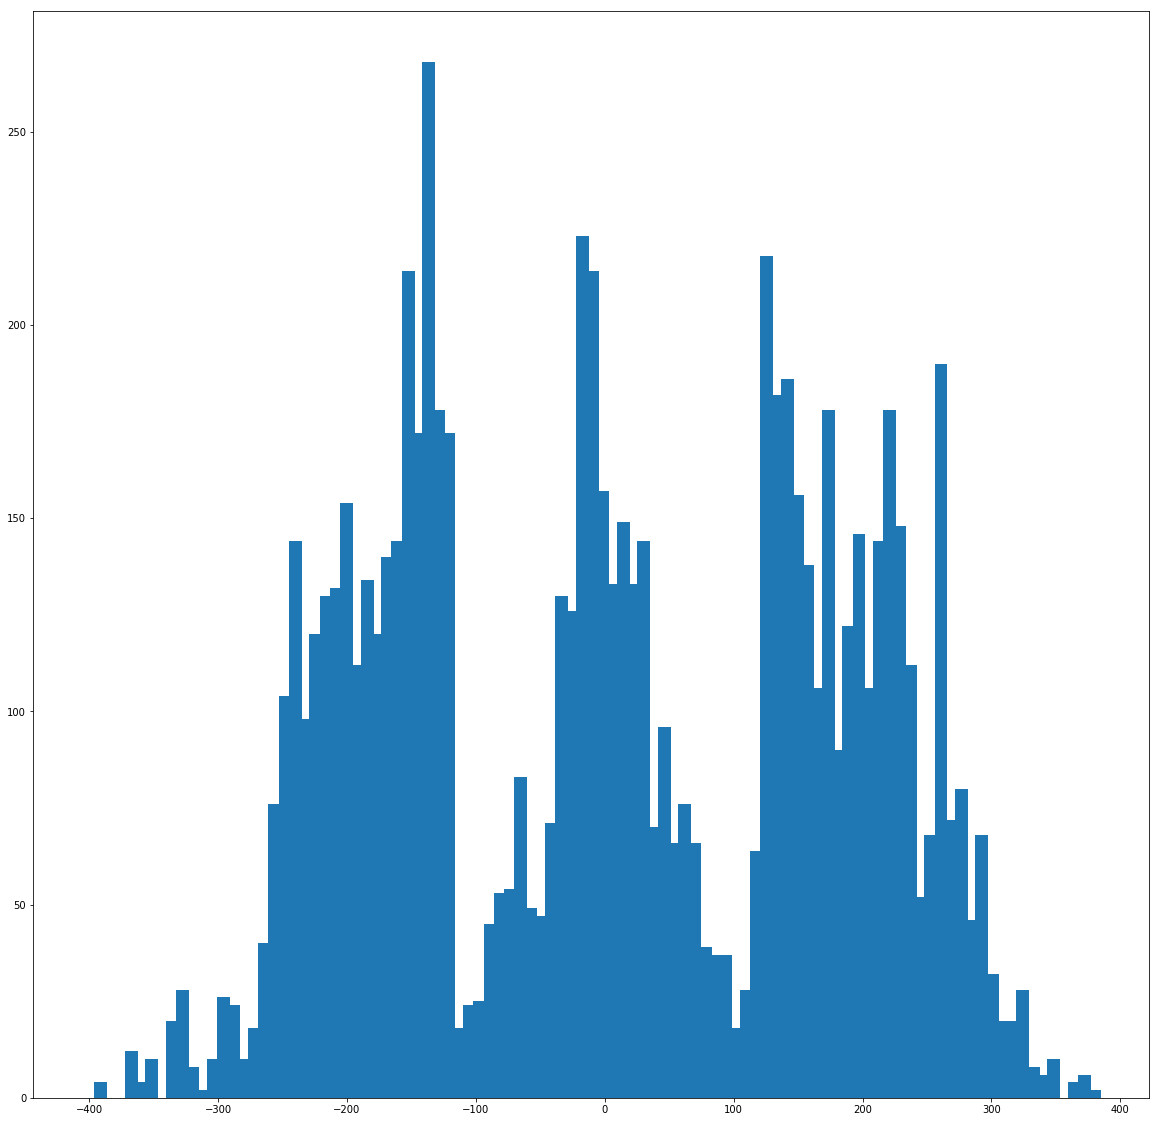

In [4]:



from sklearn.utils import shuffle
new_list = shuffle(data)
straight_threshold = 0.12

better_data_steering = new_list.iloc[:,[3]].as_matrix()
better_data_images = new_list.iloc[:,[0]].as_matrix()

print ("all data", better_data_steering.shape)
print ("all images", better_data_images.shape)


print ("all data", better_data_steering)
print ("all images", better_data_images)

turn_list = better_data_steering * 1000

print (min(turn_list))
print (max(turn_list))
print (type(turn_list))
print (type(turn_list[0]))

#bins = np.linspace(-400, 400, 100) # fixed number of bins
bins = np.linspace(math.ceil(min(turn_list)), 
                   math.floor(max(turn_list)),
                   100) # fixed number of bins
print (bins)

plt.figure(figsize=(20,20))
plt.hist(turn_list, bins=bins, width=10)
plt.show()



sharp_turn_images = better_data_images[np.logical_or(better_data_steering >= straight_threshold , better_data_steering <= -straight_threshold) ]
sharp_turn_data   = better_data_steering[np.logical_or(better_data_steering >= straight_threshold , better_data_steering <= -straight_threshold) ]
print ("sharp_turn_images",sharp_turn_images.shape)
print ("bsharp_turn_data",sharp_turn_data.shape)

straight_drv_images = better_data_images[ np.logical_and(better_data_steering <= straight_threshold , better_data_steering >= -straight_threshold) ]
straight_drv_data = better_data_steering[ np.logical_and(better_data_steering <= straight_threshold , better_data_steering >= -straight_threshold) ]
print ("straight_drv_images",straight_drv_images.shape)
print ("straight_drv_data",straight_drv_data.shape)


straight_drv_images =straight_drv_images [:straight_drv_images.shape[0]//10]
straight_drv_data =straight_drv_data [:straight_drv_data.shape[0]//10]

print ("straight_drv_images",straight_drv_images.shape)
print ("straight_drv_data",straight_drv_data.shape)


all_images  = np.concatenate ((sharp_turn_images, sharp_turn_images, straight_drv_images), axis=0)
all_data  = np.concatenate ((sharp_turn_data, sharp_turn_data, straight_drv_data), axis=0)

print ("All",all_data.shape)
print ("All",all_images.shape)

turn_mag2 = all_data*1000
print ("turn mag type", type(turn_mag2))
print ("turn mag full", turn_mag2)

#turn_list = turn_mag.values.tolist()
turn_list2 = turn_mag2

print (min(turn_list2))
print (max(turn_list2))
print (type(turn_list2))
print (type(turn_list2[0]))

#bins = np.linspace(-400, 400, 100) # fixed number of bins
bins2 = np.linspace(math.ceil(min(turn_list2)), 
                   math.floor(max(turn_list2)),
                   100) # fixed number of bins
print (bins2)

plt.figure(figsize=(20,20))
plt.hist(turn_list2, bins=bins2, width=10)
plt.show()


In [5]:
c = list(zip(all_data, all_images))
random.shuffle(c)
all_data, all_images = zip(*c)


names = all_images

for name in tqdm(names):
    print (name)
    #print (name.split('\\'))
    if name.startswith('/'):
        #print (name.split('/'))
        path = 'mydata2/IMG/'+name.split('/')[9]
        #print ("media",path)
    else:
        #print (name.split('\\'))
        path = 'mydata2/IMG/'+name.split('\\')[6]
        #print (path)
    
    image = cv2.imread(path)
    image = image[...,::-1] #conversion to rgb
    #plt.imshow(image)
    #plt.show()
    #print(image)
    images_list.append(image)
    

print ("image list", np.array(images_list).shape)

X_train = np.array(images_list[:split])
y_train = all_data[:split]
y_train = np.expand_dims(y_train, axis=1)

X_valid = np.array(images_list[split:])
y_valid = all_data[split:]
y_valid = np.expand_dims(y_valid, axis=1)

print("x train shape",X_train.shape)
print("y train shape",y_train.shape)

print("x valid shape",X_valid.shape)
print("y valid shape", y_valid.shape)


def nvidia_model():
    model = Sequential()
    nv_model = Sequential()
    nv_model.add (Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    nv_model.add (Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))
    
    nv_model.add (Conv2D(24, (5,5), strides=1, padding="valid"))
    nv_model.add (ELU())
    nv_model.add ((MaxPooling2D(pool_size=(2,2))))

    nv_model.add (Conv2D(36, (5,5), strides=1, padding="valid"))
    nv_model.add (ELU())
    nv_model.add ((MaxPooling2D(pool_size=(2,2))))
        
    nv_model.add (Conv2D(48, (5,5), strides=1, padding="valid"))
    nv_model.add (ELU())
    nv_model.add ((MaxPooling2D(pool_size=(2,2))))
    
    nv_model.add (Conv2D(64, (3,3), strides=1, padding="valid"))
    nv_model.add (ELU())
    
    nv_model.add (Conv2D(64, (3,3), strides=1, padding="valid"))
    nv_model.add (ELU())
    
     
    nv_model.add(Flatten())
    nv_model.add(Dense(1164))
    nv_model.add(ELU())
    nv_model.add(Dense(100))
    nv_model.add(ELU())
    nv_model.add(Dense(50))
    nv_model.add(ELU())
    nv_model.add(Dense(10))
    nv_model.add(ELU())
    
    nv_model.add(Dense(1, activation="linear"))
    nv_model.compile(optimizer="adam", metrics=['accuracy'], loss="mse")
    return nv_model

my_model = nvidia_model()


my_model.fit(X_train, y_train,  validation_data=(X_valid,y_valid), shuffle=True, batch_size=32, epochs=5, verbose=1)
my_model.save("model.h5")
#score = model.evaluate(x_test, y_test, batch_size=32)



  1%|▏         | 122/8241 [00:00<00:06, 1213.44it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_26_582.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_11_395.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_05_782.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_25_723.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_11_134.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_11_573.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_37_002.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_00_662.jpg
S:\A

  3%|▎         | 208/8241 [00:00<00:39, 205.32it/s] 

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_13_285.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_34_899.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_35_881.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_51_004.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_11_185.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_57_154.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_55_508.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_03_548.jpg
S:\A

  4%|▍         | 368/8241 [00:01<00:23, 330.42it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_37_605.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_39_196.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_07_505.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_41_160.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_15_624.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_56_910.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_27_272.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_12_971.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

  7%|▋         | 564/8241 [00:01<00:15, 497.60it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_22_257.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_51_004.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_38_231.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_53_618.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_36_893.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_49_669.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_36_421.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_25_907.jpg
S:\AI NEURAL NETWORKS P

 10%|▉         | 787/8241 [00:01<00:10, 690.68it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_34_437.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_27_156.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_41_145.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_57_010.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_21_486.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_03_779.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_33_198.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_51_898.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS P

 12%|█▏        | 1022/8241 [00:01<00:08, 873.67it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_44_479.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_55_987.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_51_105.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_18_277.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_27_744.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_37_315.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_34_896.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_07_204.jpg
S:\AI NEURAL NETWORKS P

 15%|█▌        | 1248/8241 [00:01<00:07, 934.70it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_37_032.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_51_349.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_15_624.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_42_46_906.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_39_783.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_09_627.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_36_180.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_35_309.jpg
S:\AI NEURAL NETWORKS P

 18%|█▊        | 1468/8241 [00:02<00:06, 1009.03it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_37_460.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_48_267.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_23_790.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_14_973.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_10_505.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_21_771.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_33_092.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_51_986.jpg
S:\AI NEURAL NETWORKS P

 20%|██        | 1683/8241 [00:02<00:06, 993.55it/s] 

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_50_639.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_19_210.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_38_016.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_11_916.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_50_590.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_25_607.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_11_412.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_48_880.jpg
S:\A

 23%|██▎       | 1922/8241 [00:02<00:05, 1084.84it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_20_339.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_01_36_260.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_08_518.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_02_762.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_33_238.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_34_313.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_26_880.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_48_530.jpg
/med

 26%|██▌       | 2153/8241 [00:02<00:05, 1116.84it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_26_780.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_10_243.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_45_599.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_38_951.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_11_267.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_15_975.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_15_545.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_20_203.jpg
S:\AI NEURAL NETWORKS P

 29%|██▉       | 2391/8241 [00:03<00:05, 1088.15it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_12_828.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_03_701.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_48_952.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_03_128.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_51_465.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_44_804.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_37_981.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_23_738.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 32%|███▏      | 2633/8241 [00:03<00:04, 1127.42it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_20_957.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_48_680.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_43_065.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_23_516.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_08_244.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_41_740.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_35_991.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_43_619.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 33%|███▎      | 2748/8241 [00:03<00:04, 1106.94it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_02_827.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_49_379.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_22_617.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_12_266.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_36_922.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_47_757.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_12_971.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_24_976.jpg
S:\A

 36%|███▌      | 2974/8241 [00:03<00:04, 1074.99it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_46_567.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_13_494.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_34_172.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_12_231.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_03_596.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_49_591.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_21_858.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_58_582.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS P

 39%|███▉      | 3205/8241 [00:03<00:04, 1081.82it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_35_881.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_09_356.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_00_977.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_09_695.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_12_419.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_08_413.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_45_137.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\c

 42%|████▏     | 3441/8241 [00:03<00:04, 1096.63it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_32_135.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_48_581.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_11_320.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_01_37_461.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_42_28_871.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_27_010.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_11_105.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_48_751.jpg
/media/michal/DawneF4/A

 45%|████▌     | 3724/8241 [00:04<00:03, 1208.26it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_11_044.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_14_238.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_15_030.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_55_768.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_38_599.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_01_663.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_12_642.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_11_666.jpg
/media/michal/DawneF4/A

 47%|████▋     | 3848/8241 [00:04<00:04, 1071.50it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_32_972.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_03_283.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_25_423.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_47_800.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_42_28_138.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_51_732.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_37_829.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_13_841.jpg
S:\AI NEURAL NETWORKS P

 48%|████▊     | 3960/8241 [00:04<00:04, 881.68it/s] 

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_24_769.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_42_41_961.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_40_861.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_01_39_202.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_58_971.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_24_406.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_12_512.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05

 51%|█████     | 4170/8241 [00:04<00:04, 892.22it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_35_892.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_11_681.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_37_166.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_21_967.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_49_991.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_57_123.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_13_469.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_29_292.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 53%|█████▎    | 4374/8241 [00:05<00:04, 858.28it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_10_621.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_45_397.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_24_872.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_21_442.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_59_678.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_50_286.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_35_343.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_01_669.jpg
/media/michal/DawneF4/A

 56%|█████▌    | 4579/8241 [00:05<00:03, 927.12it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_34_384.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_23_544.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_24_623.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_46_109.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_27_411.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_19_792.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_42_178.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_45_468.jpg
/media/michal/DawneF4/A

 58%|█████▊    | 4792/8241 [00:05<00:03, 927.07it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_48_426.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_33_081.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_46_904.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_16_809.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_33_636.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_34_990.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_46_740.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_34_028.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEG

 59%|█████▉    | 4888/8241 [00:05<00:03, 864.39it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_44_844.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_14_275.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_03_205.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_03_457.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_42_684.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_38_463.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_10_828.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_47_482.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEG

 61%|██████▏   | 5062/8241 [00:05<00:04, 793.94it/s]


S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_01_091.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_52_048.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_47_148.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_46_758.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_22_184.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_43_785.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_13_811.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_13_752.jpg
/media/michal/DawneF4/

 64%|██████▎   | 5236/8241 [00:06<00:03, 757.26it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_21_936.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_49_376.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_04_472.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_37_460.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_30_020.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_44_558.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_14_845.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_00_310.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEG

 66%|██████▌   | 5455/8241 [00:06<00:03, 898.92it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_48_014.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_24_428.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_24_699.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_55_020.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_24_951.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_45_927.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_52_114.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_01_711.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 67%|██████▋   | 5552/8241 [00:06<00:03, 786.21it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_14_361.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_07_579.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_27_487.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_21_936.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_23_896.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_11_423.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_37_647.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_34_662.jpg
/med

 69%|██████▉   | 5718/8241 [00:06<00:03, 756.81it/s]


/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_52_507.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_09_599.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_56_984.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_20_417.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_01_366.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_59_377.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_10_697.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_0

 72%|███████▏  | 5908/8241 [00:06<00:02, 826.94it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_47_800.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_20_041.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_16_453.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_22_254.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_08_976.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_32_284.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_01_376.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05

 74%|███████▍  | 6123/8241 [00:07<00:02, 936.22it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_49_893.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_01_819.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_00_752.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_23_683.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_49_505.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_22_979.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_35_687.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05

 76%|███████▌  | 6239/8241 [00:07<00:02, 975.00it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_14_224.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_35_019.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_37_646.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_20_128.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_36_264.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_37_594.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_46_836.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_25_828.jpg
S:\AI NEURAL NETWORKS P

 78%|███████▊  | 6460/8241 [00:07<00:01, 992.76it/s] 

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_58_286.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_48_093.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_25_765.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_09_985.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_46_149.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_14_734.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_21_157.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_04_495.jpg
S:\A

 81%|████████  | 6656/8241 [00:07<00:01, 885.89it/s]


/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_11_299.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_59_740.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_19_838.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_49_967.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_51_033.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_35_339.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_34_961.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_40_739.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS 

 83%|████████▎ | 6852/8241 [00:07<00:01, 900.61it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_57_211.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_25_224.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_22_329.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_46_317.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_36_245.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_45_883.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_37_294.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_45_137.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS P

 84%|████████▍ | 6945/8241 [00:08<00:01, 749.30it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_21_704.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_14_879.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_09_254.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_20_349.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_26_813.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_16_082.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_24_572.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_46_022.jpg
S:\A

 87%|████████▋ | 7133/8241 [00:08<00:01, 834.46it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_10_936.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_32_206.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_47_510.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_56_768.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_24_334.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_23_089.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_57_062.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_46_205.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS P

 89%|████████▊ | 7301/8241 [00:08<00:01, 731.29it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_25_053.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_27_606.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_46_642.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_23_559.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_37_080.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_29_665.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_02_976.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_36_319.jpg
S:\A

 91%|█████████ | 7495/8241 [00:08<00:00, 821.11it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_14_860.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_45_770.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_14_544.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_22_842.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_23_339.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_16_380.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_27_395.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_14_099.jpg
S:\AI NEURAL NETWORKS P

 92%|█████████▏| 7583/8241 [00:08<00:00, 798.92it/s]


S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_14_537.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_15_244.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_26_256.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_51_496.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_19_641.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_27_054.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_26_701.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_21_897.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODE

 94%|█████████▍| 7750/8241 [00:09<00:00, 775.64it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_12_865.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_29_073.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_29_434.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_56_927.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_26_426.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_59_405.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_03_624.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_27_641.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\

 96%|█████████▌| 7903/8241 [00:09<00:00, 682.00it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_11_538.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_49_233.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_30_745.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_12_988.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_59_086.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_34_07_379.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_44_817.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_47_422.jpg
/media/michal/DawneF4/A

 97%|█████████▋| 7988/8241 [00:09<00:00, 704.65it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_15_787.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_37_010.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_36_479.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_38_915.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_35_456.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_09_163.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_02_377.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_04_850.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 99%|█████████▉| 8146/8241 [00:09<00:00, 698.69it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_45_990.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_36_368.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_02_582.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_34_42_088.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_47_254.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_14_911.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_01_744.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_50_584.jpg
/med

100%|██████████| 8241/8241 [00:09<00:00, 847.40it/s]


S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_33_853.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_09_516.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_46_980.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_00_360.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_56_492.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_14_100.jpg
image list (8241, 160, 320, 3)
x train shape (8000, 160, 320, 3)
y train shape (8000, 1)
x valid shape (241, 160, 320, 3)
y valid shape (241, 1)
Train on 8000 samples, validate on 241 samples
Epoch 1/5
8000/8000 [==============================] - 85s - loss: 0.1063 - acc: